In [120]:
import seml
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd

In [121]:
output_dir = "figures"

# CPU

In [168]:
results = seml.get_results('scg_cpu_mem_final', to_data_frame=True)

  0%|          | 0/123 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

In [169]:
results = results[results["config.fpath"] != "/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_65536.h5ad"]

In [170]:
def adapt_model(x):
    if x["config.fpath"] is not None:
        if x["config.model"] == "WOT":
            return "WOT"
        rank = x["config.rank"]
        gamma = x["config.gamma"]
        if not pd.isna(x["config.batch_size"]):
            if rank==-1:
                return "moscot_online"
            return f"moscot_online_{rank}_{gamma}"
        if rank==-1:
            return "moscot"
        return f"moscot_{rank}_{gamma}"
    if x["config.model"] == "Moscot_online":
        return "moscot_online"
    
results["model_adapted"] = results.apply(lambda x: adapt_model(x), axis=1)

In [171]:
def adapt_error(x):
    if isinstance(x['result.error'], np.ndarray):
        return x['result.error'][0]
    return x['result.error']

results["error_adapted"] = results.apply(lambda x: adapt_error(x), axis=1)

In [172]:
dic = {}
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_1024.h5ad"] = 1024+256
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_2048.h5ad"] = 2048+512
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_4096.h5ad"] = 4096+1024
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_8192.h5ad"] = 8192+2048
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_16384.h5ad"] = 16384+4096
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_32768.h5ad"] = 32768+8192
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_65536.h5ad"] = 65536+16384
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_131072.h5ad"] = 131072+32768

In [173]:
import pandas as pd
results["n_cells"] = results["config.fpath"].map(dic)

In [174]:
results["max_mem"] = results.apply(lambda x: max(x["result.benchmark_result"]), axis=1)

In [175]:
import seaborn as sns
sns.set_style("whitegrid", {'xtick.direction': 'out', 'xtick.major.size': 5.0, 'xtick.minor.size': 5.0,
    'ytick.color': '.15', 'ytick.direction': 'out', 'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 
                           'font.family': ['DejaVu Sans'], 'font.scale': 1})
palette = 'deep'

In [176]:
labels_dict = {}

labels_dict["WOT"] = "WOT"
labels_dict["moscot"] = "moscot"
labels_dict["moscot_online"] = "moscot online"
labels_dict['moscot_1000.0_10.0'] = "moscot, r1000"
labels_dict['moscot_200.0_10.0'] = "moscot, r200"
labels_dict['moscot_50.0_10.0'] = "moscot, r50"

In [177]:

d = results[~results["config.gamma"].isin([0.01,0.1,1,100])]

In [185]:
list(sns.color_palette())

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [182]:
d

,_id,config.overwrite,config.db_collection,config.benchmark_mode,config.epsilon,config.fpath,config.lambda_1,config.lambda_2,config.max_iterations,config.model,...,result.entropy,result.converged,config.batch_size,config.gamma,config.rank,config.initializer,model_adapted,error_adapted,n_cells,max_mem
0,1,1,scg_cpu_mem_final,cpu_memory,0.05,/lustre/groups/ml01/datasets/projects/2022-02-...,2,10,1000000.0,WOT,...,9.559916,2,NaN,NaN,NaN,NaN,WOT,1.111685,1280,580.429688
1,2,2,scg_cpu_mem_final,cpu_memory,0.05,/lustre/groups/ml01/datasets/projects/2022-02-...,2,10,1000000.0,WOT,...,11.017053,2,NaN,NaN,NaN,NaN,WOT,0.416700,2560,638.421875
2,3,3,scg_cpu_mem_final,cpu_memory,0.05,/lustre/groups/ml01/datasets/projects/2022-02-...,2,10,1000000.0,WOT,...,12.292444,2,NaN,NaN,NaN,NaN,WOT,0.438031,5120,809.496094
3,4,4,scg_cpu_mem_final,cpu_memory,0.05,/lustre/groups/ml01/datasets/projects/2022-02-...,2,10,1000000.0,WOT,...,13.682669,2,NaN,NaN,NaN,NaN,WOT,1.186262,10240,1457.246094
4,5,5,scg_cpu_mem_final,cpu_memory,0.05,/lustre/groups/ml01/datasets/projects/2022-02-...,2,10,1000000.0,WOT,...,15.195795,2,NaN,NaN,NaN,NaN,WOT,0.372396,20480,4258.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,149,149,scg_cpu_mem_final,cpu_memory,0.05,/lustre/groups/ml01/datasets/projects/2022-02-...,2,10,1000000.0,moscot,...,[15.845090932702725],True,NaN,10.0,200.0,random,moscot_200.0_10.0,0.368271,20480,2305.500000
116,150,150,scg_cpu_mem_final,cpu_memory,0.05,/lustre/groups/ml01/datasets/projects/2022-02-...,2,10,1000000.0,moscot,...,[15.863442784768488],True,NaN,10.0,1000.0,random,moscot_1000.0_10.0,0.367334,20480,2267.632812
117,151,151,scg_cpu_mem_final,cpu_memory,0.05,/lustre/groups/ml01/datasets/projects/2022-02-...,2,10,1000000.0,moscot,...,[17.404489849069062],True,NaN,10.0,50.0,random,moscot_50.0_10.0,0.404151,40960,5826.714844
118,152,152,scg_cpu_mem_final,cpu_memory,0.05,/lustre/groups/ml01/datasets/projects/2022-02-...,2,10,1000000.0,moscot,...,[17.400848777315858],True,NaN,10.0,200.0,random,moscot_200.0_10.0,0.397898,40960,5879.957031


In [194]:
c = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [192]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(c)

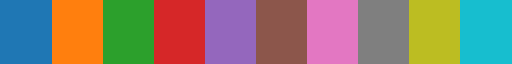

In [193]:
cmap

In [201]:
labels_dict.keys()

dict_keys(['WOT', 'moscot', 'moscot_online', 'moscot_1000.0_10.0', 'moscot_200.0_10.0', 'moscot_50.0_10.0'])

In [211]:
d["model_adapted_2"] = pd.Categorical(d["model_adapted"], categories=(['WOT', 'moscot', 'moscot_online',  'moscot_1000.0_10.0','moscot_200.0_10.0', 'moscot_50.0_10.0']))




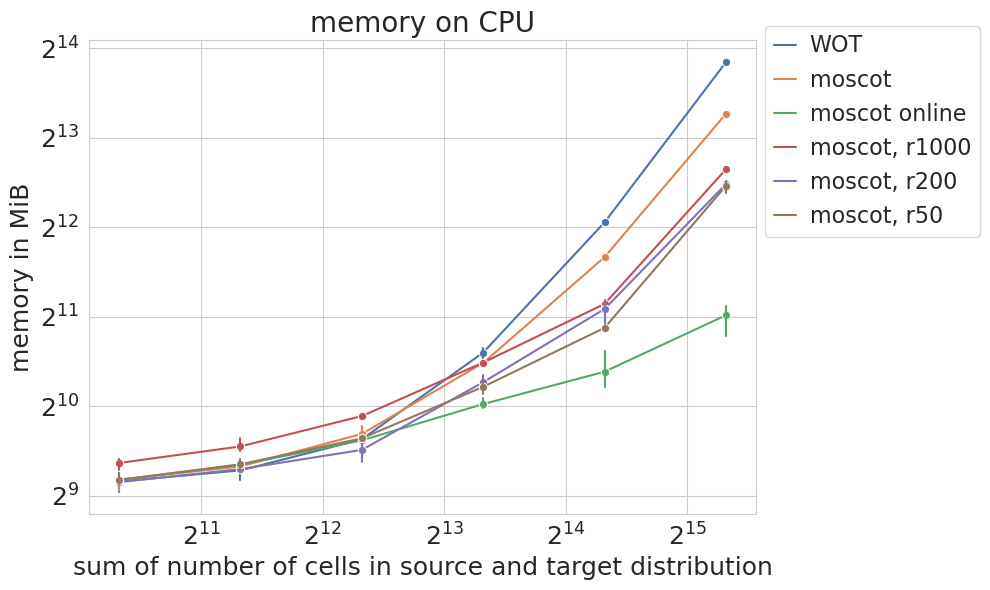

In [212]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
pl = sns.lineplot(x='n_cells', y='max_mem', hue="model_adapted_2", err_style="bars", marker='o',
                     data=d, ax=axs, palette=palette, markers=True)
plt.xscale('log', base=2)
plt.yscale('log', base=2)
handles, _labels = axs.get_legend_handles_labels()

labels = [*map(labels_dict.get, _labels)]

axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, 
            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6, bbox_to_anchor=(1, 1.05))

axs.set_ylabel('memory in MiB', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("memory on CPU", fontsize=20)
_, xlabels = plt.xticks()

start, end = axs.get_xlim()
#axs.xaxis.set_ticks((10**3, 10**3.5, 10**4, 10**4.5, 10**5))
#axs.set_xticklabels(("1,000", "3,160", "10,000", "31,600", "100,000"))
#axs.yaxis.set_ticks((10**3, 10**4))
#axs.set_yticklabels(("1,000", "10,000"))
plt.tight_layout()
#if save_figure:
#    plt.savefig(FIG_DIR + f'/fig_2_b.jpg', dpi=300)
plt.show()

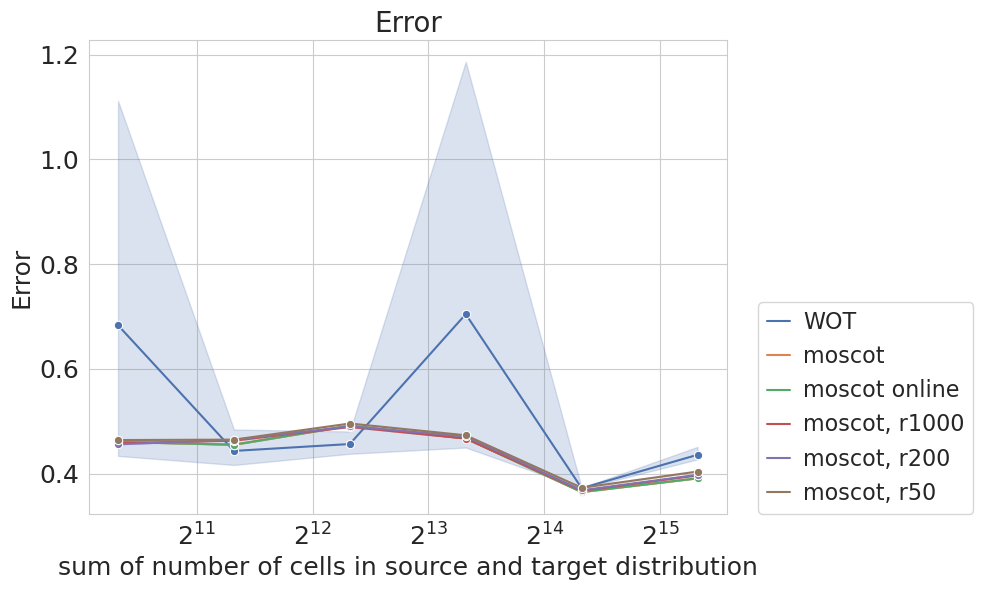

In [215]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
pl = sns.lineplot(x='n_cells', y='error_adapted', hue="model_adapted_2", marker='o', 
                     data=d, ax=axs, palette=palette, markers=True)
plt.xscale('log', base=2)
handles, _labels = axs.get_legend_handles_labels()

labels = [*map(labels_dict.get, _labels)]

axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

#axs.set_ylabel('Ratio of reg. Wasserstein distances\n between ground truth and predicted descandants/ancestors calculated and\n independent coupling', fontsize=18)
axs.set_ylabel("Error", fontsize=18)
axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("Error", fontsize=20)
_, xlabels = plt.xticks()

#axs.text("Error: ratio of Wasserstein distances between ground truth and predictions obtained by the calculated OT map and predictions obtained by the independent coupling.")




plt.tight_layout()